In [28]:
# https://archive.ics.uci.edu/ml/datasets/Student+Performance

<p class="small-heading"><b>Data Set Information:</b></p>
<p class="normal">This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).</p>

<br />

<p class="small-heading"><b>Attribute Information:</b></p>
<p class="normal"># Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
<br>1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
<br>2 sex - student's sex (binary: 'F' - female or 'M' - male)
<br>3 age - student's age (numeric: from 15 to 22)
<br>4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
<br>5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
<br>6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
<br>7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
<br>8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
<br>9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
<br>10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
<br>11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
<br>12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
<br>13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
<br>14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
<br>15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
<br>16 schoolsup - extra educational support (binary: yes or no)
<br>17 famsup - family educational support (binary: yes or no)
<br>18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
<br>19 activities - extra-curricular activities (binary: yes or no)
<br>20 nursery - attended nursery school (binary: yes or no)
<br>21 higher - wants to take higher education (binary: yes or no)
<br>22 internet - Internet access at home (binary: yes or no)
<br>23 romantic - with a romantic relationship (binary: yes or no)
<br>24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
<br>25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
<br>26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
<br>27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
<br>28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
<br>29 health - current health status (numeric: from 1 - very bad to 5 - very good)
<br>30 absences - number of school absences (numeric: from 0 to 93)
<br>
<br># these grades are related with the course subject, Math or Portuguese:
<br>31 G1 - first period grade (numeric: from 0 to 20)
<br>31 G2 - second period grade (numeric: from 0 to 20)
<br>32 G3 - final grade (numeric: from 0 to 20, output target)</p>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")


In [30]:
df = pd.read_csv('/Users/nfanlo/dev/technical-test/part1/data/student.csv', sep=';')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [32]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [33]:
df.shape

(649, 33)

In [34]:
print('Null values in columns:')
print(df.isnull().sum())

Null values in columns:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [35]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


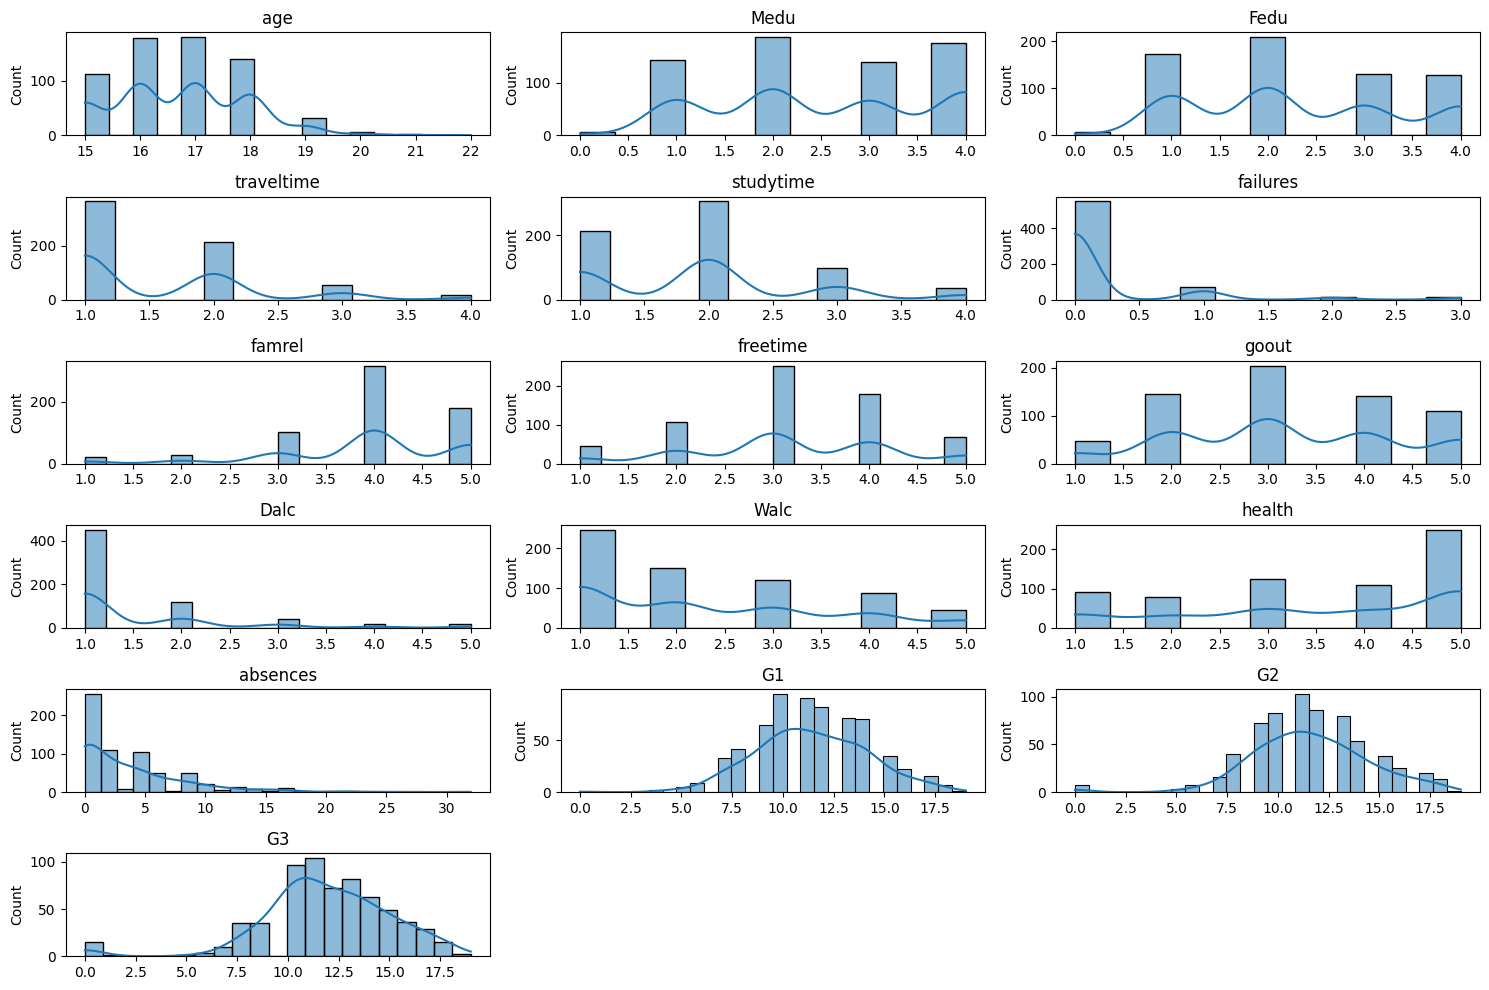

In [36]:
# Histograms for numeric variables
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols)//3 + 1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


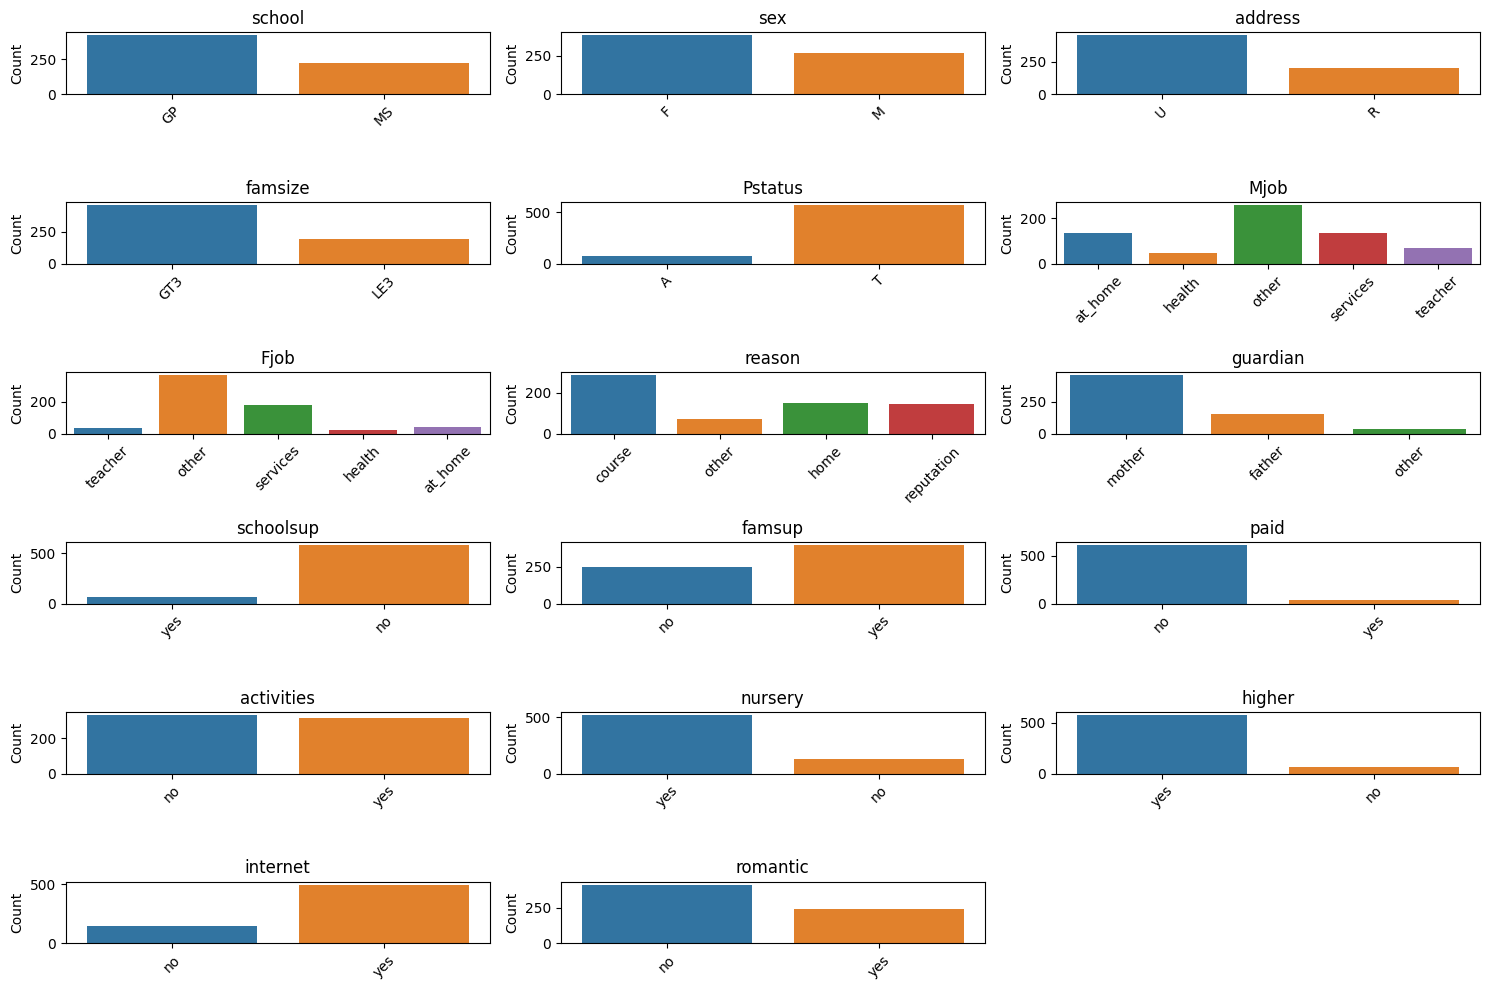

In [37]:
#Bar charts for categorical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols)//3 + 1, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


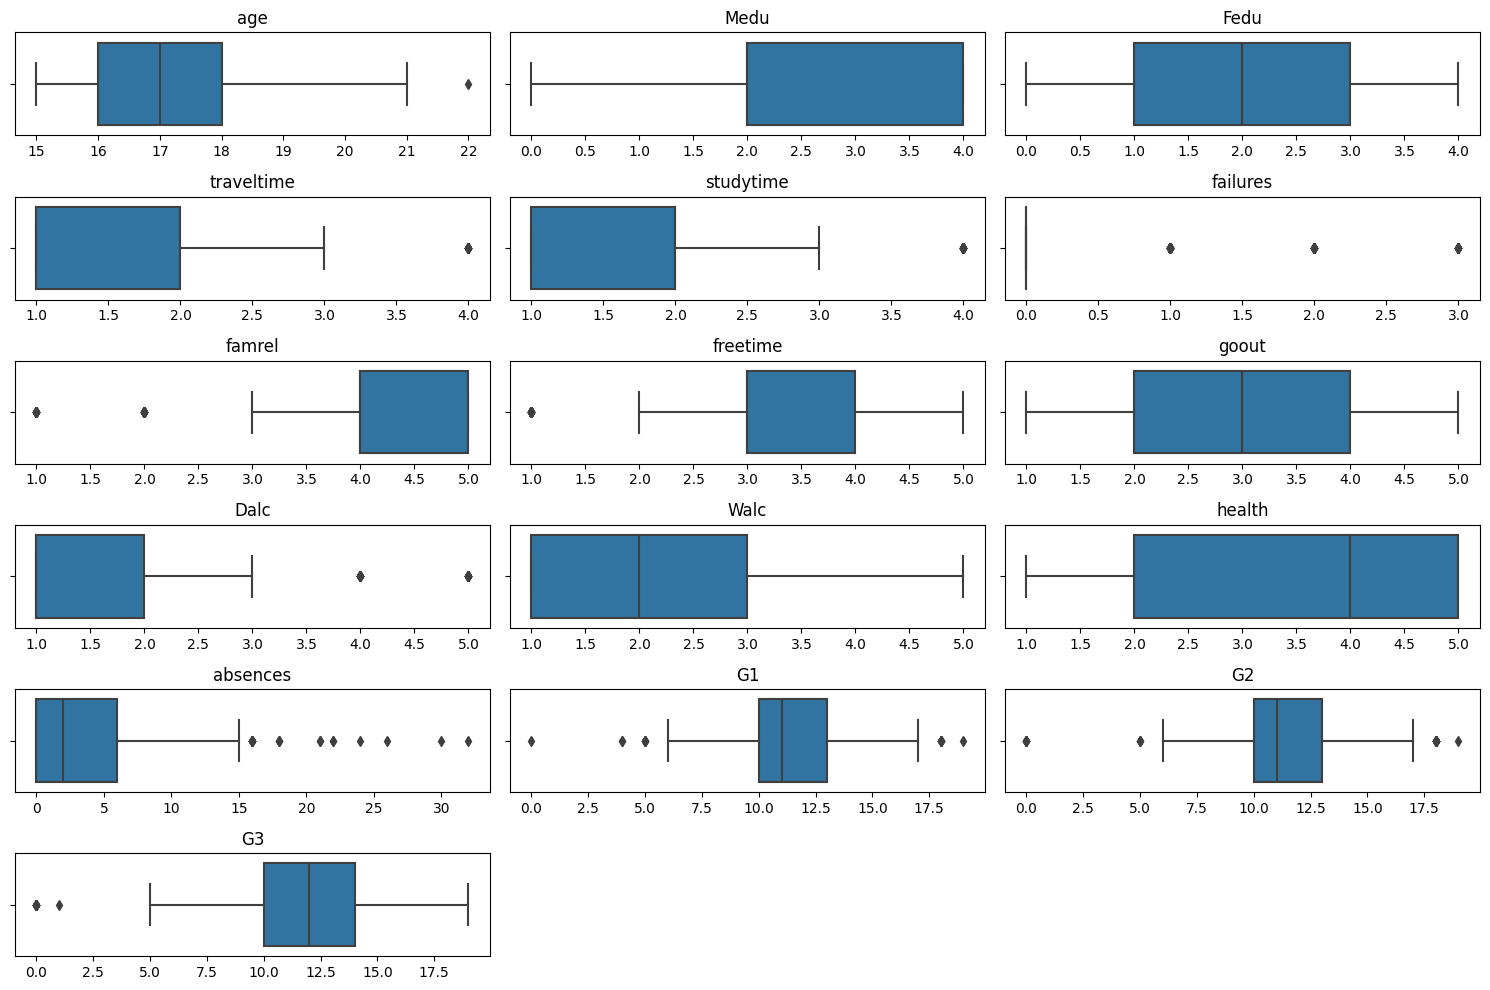

In [38]:
#Box plots for numerical variables (detect outliers)
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols)//3 + 1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()


In [39]:
#There are quite a few outliers in the dataset but since it contains very little data (649) it is decided not to eliminate them. 
#At the end of the notebook they will be tried to be eliminated to compare the results of the models.

def count_outliers(df):
    outlier_counts = {}
    for col in df.select_dtypes(include='number').columns:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        outlier_counts[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    return outlier_counts

outlier_counts = count_outliers(df)

for col, count in outlier_counts.items():
    print(f'{col}: {count} outliers')


age: 1 outliers
Medu: 0 outliers
Fedu: 0 outliers
traveltime: 16 outliers
studytime: 35 outliers
failures: 100 outliers
famrel: 51 outliers
freetime: 45 outliers
goout: 0 outliers
Dalc: 34 outliers
Walc: 0 outliers
health: 0 outliers
absences: 21 outliers
G1: 16 outliers
G2: 25 outliers
G3: 16 outliers


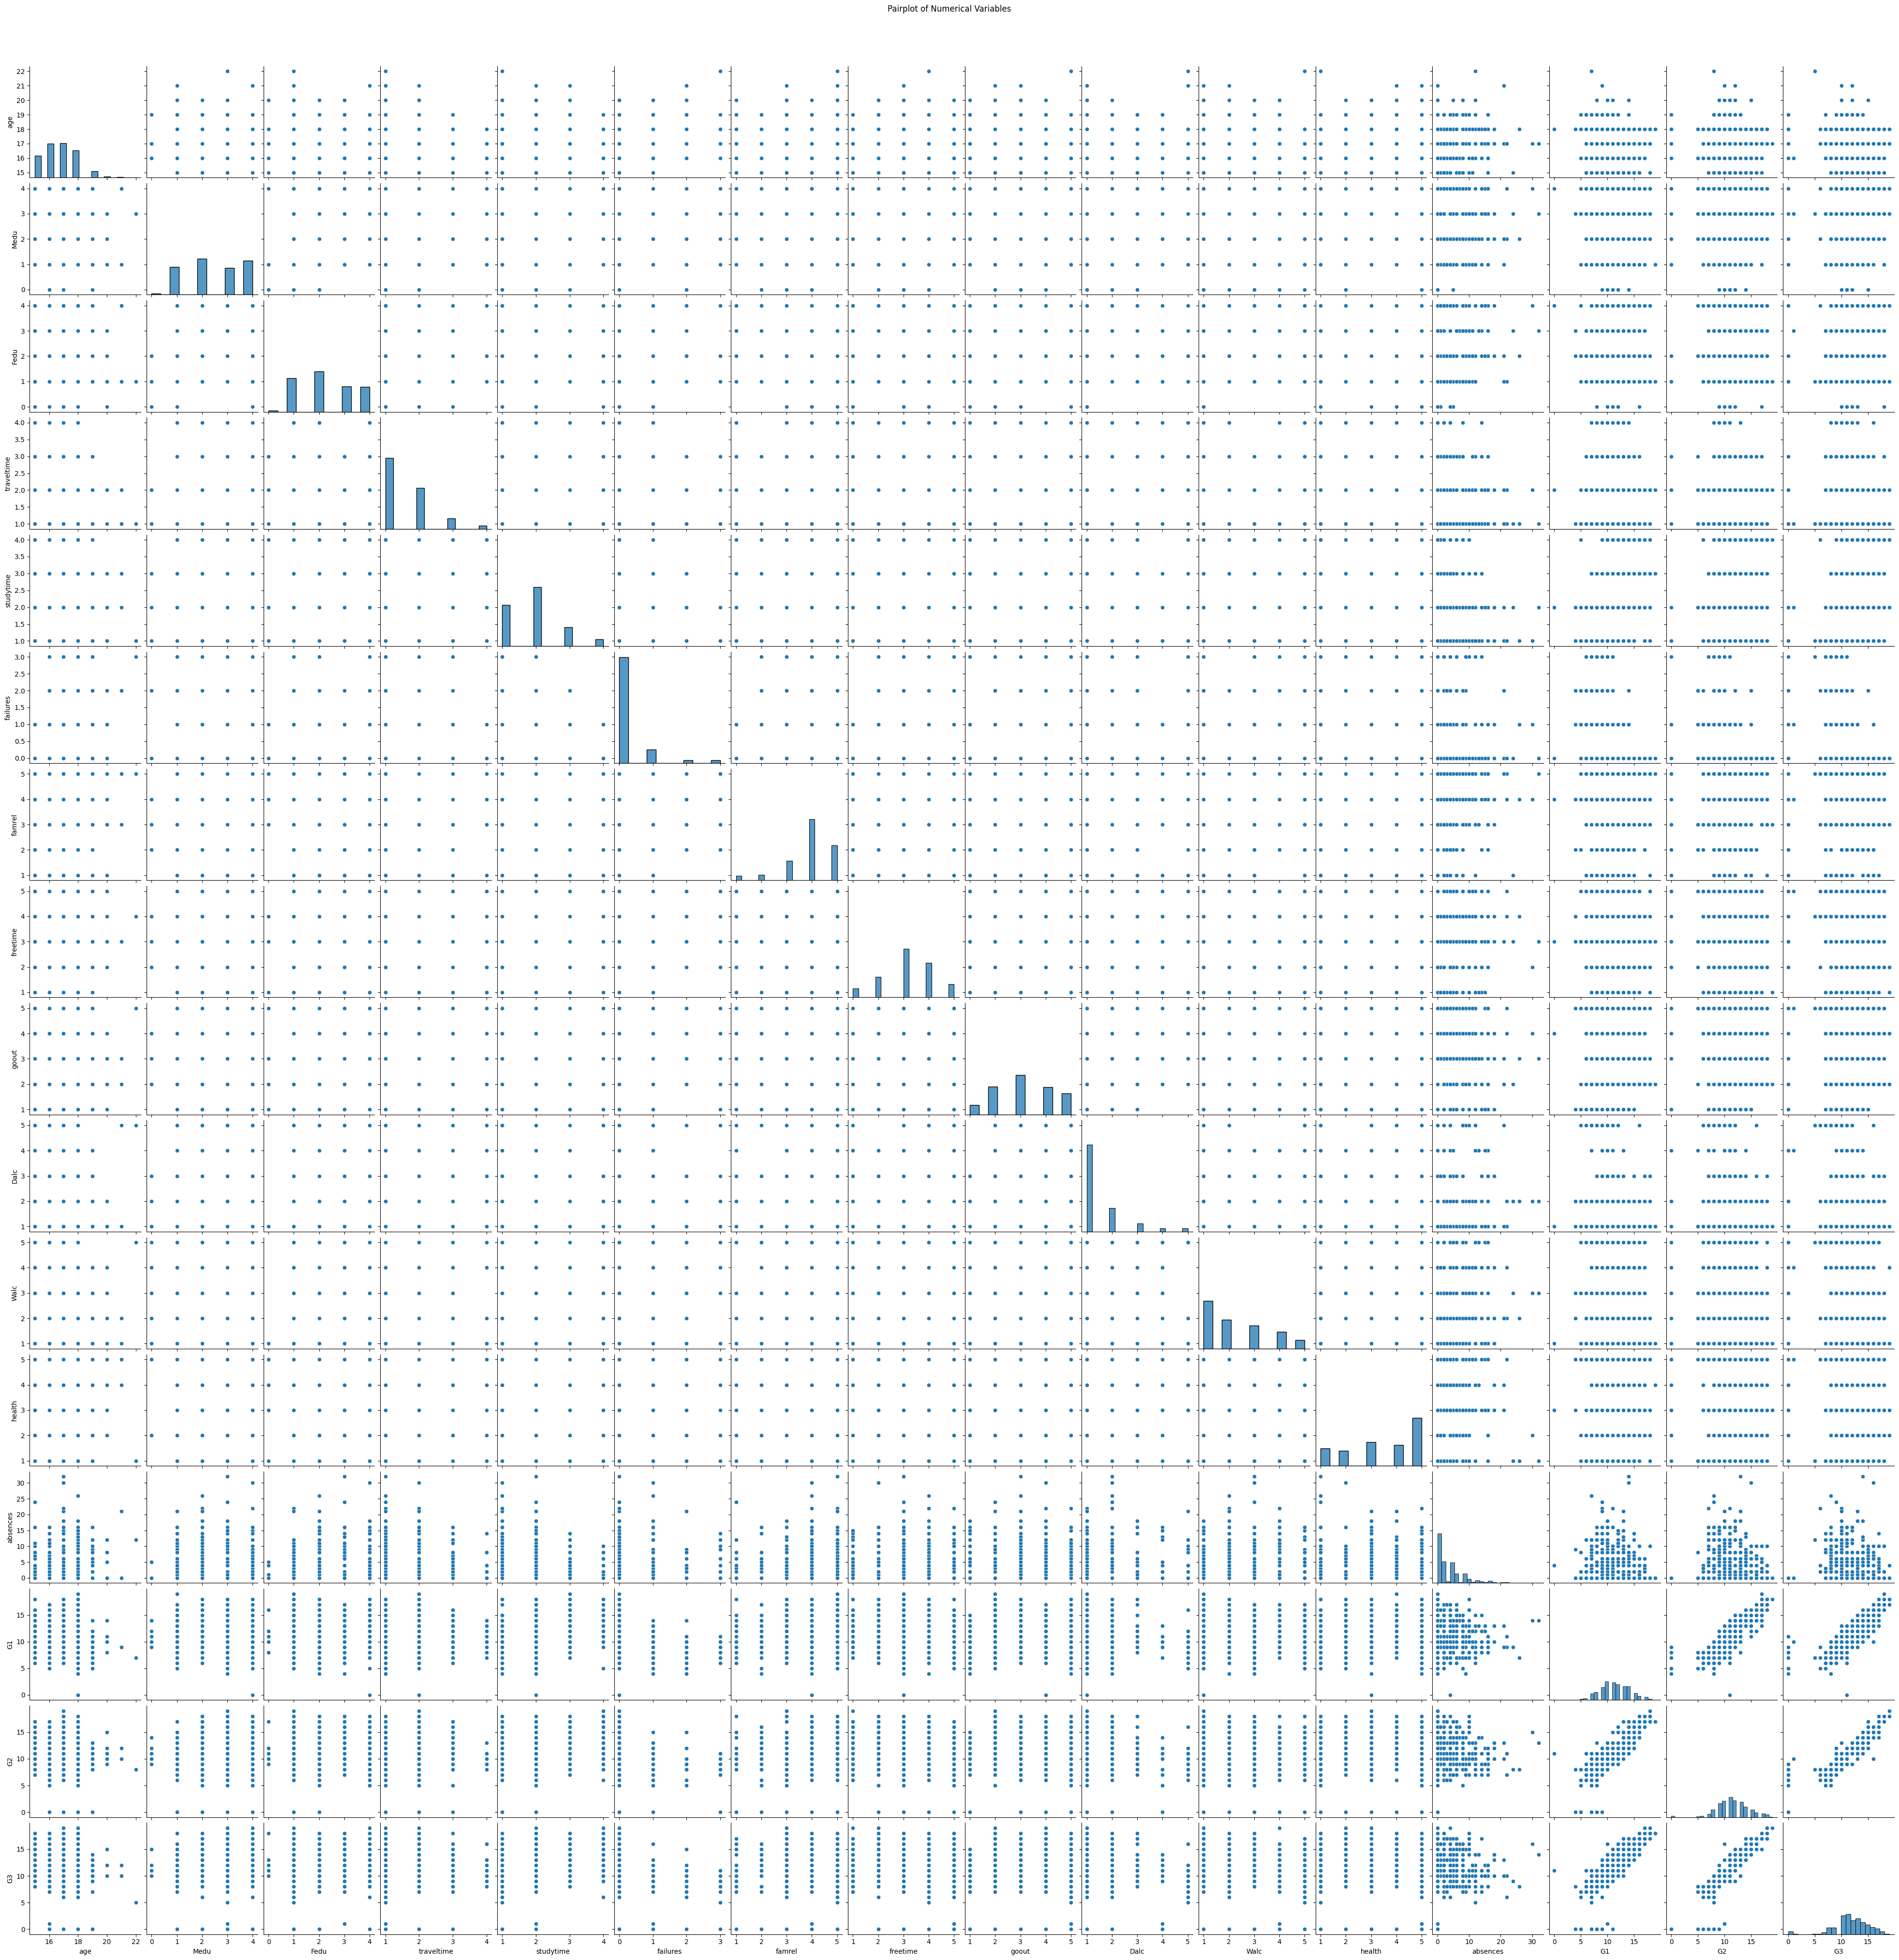

In [40]:
#Scatter matrix for numerical variables
sns.pairplot(df[num_cols])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


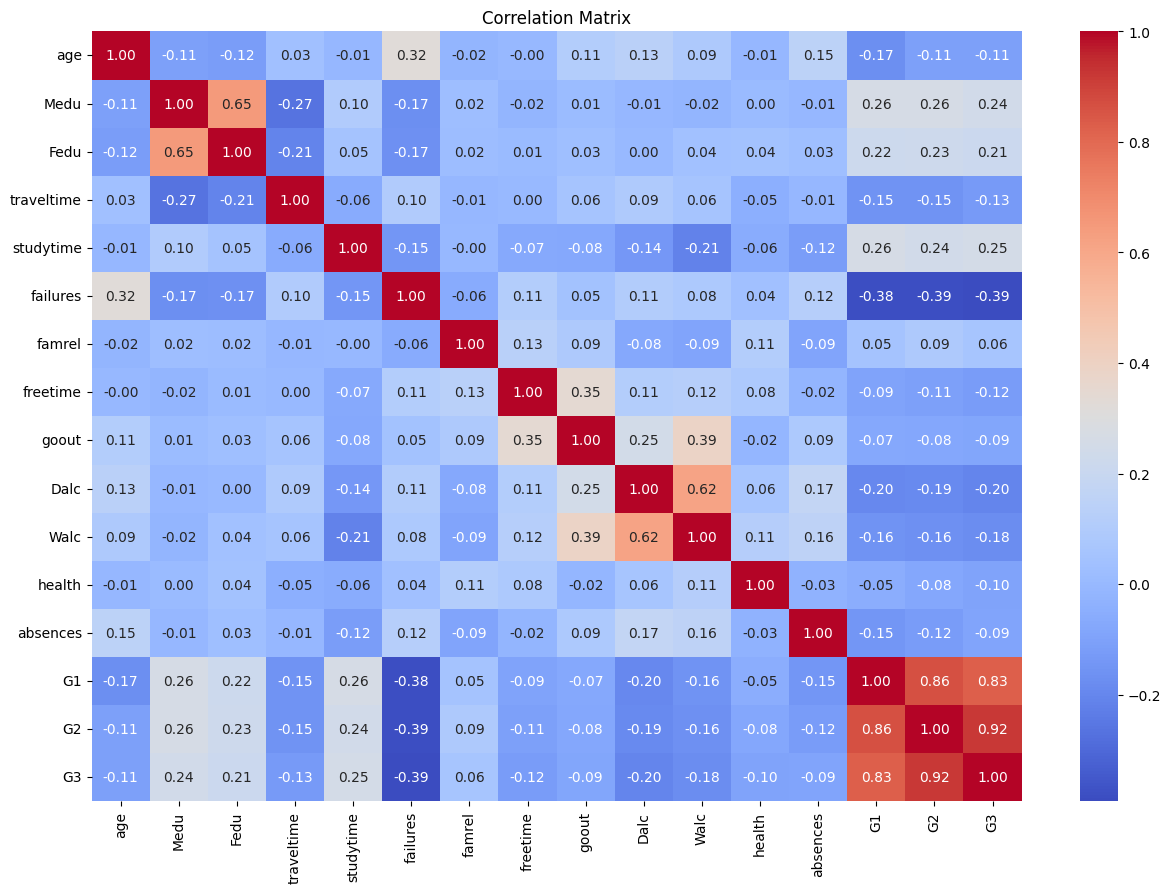

In [41]:
#Heat map of the correlation between numerical variables
plt.figure(figsize=(15, 10))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


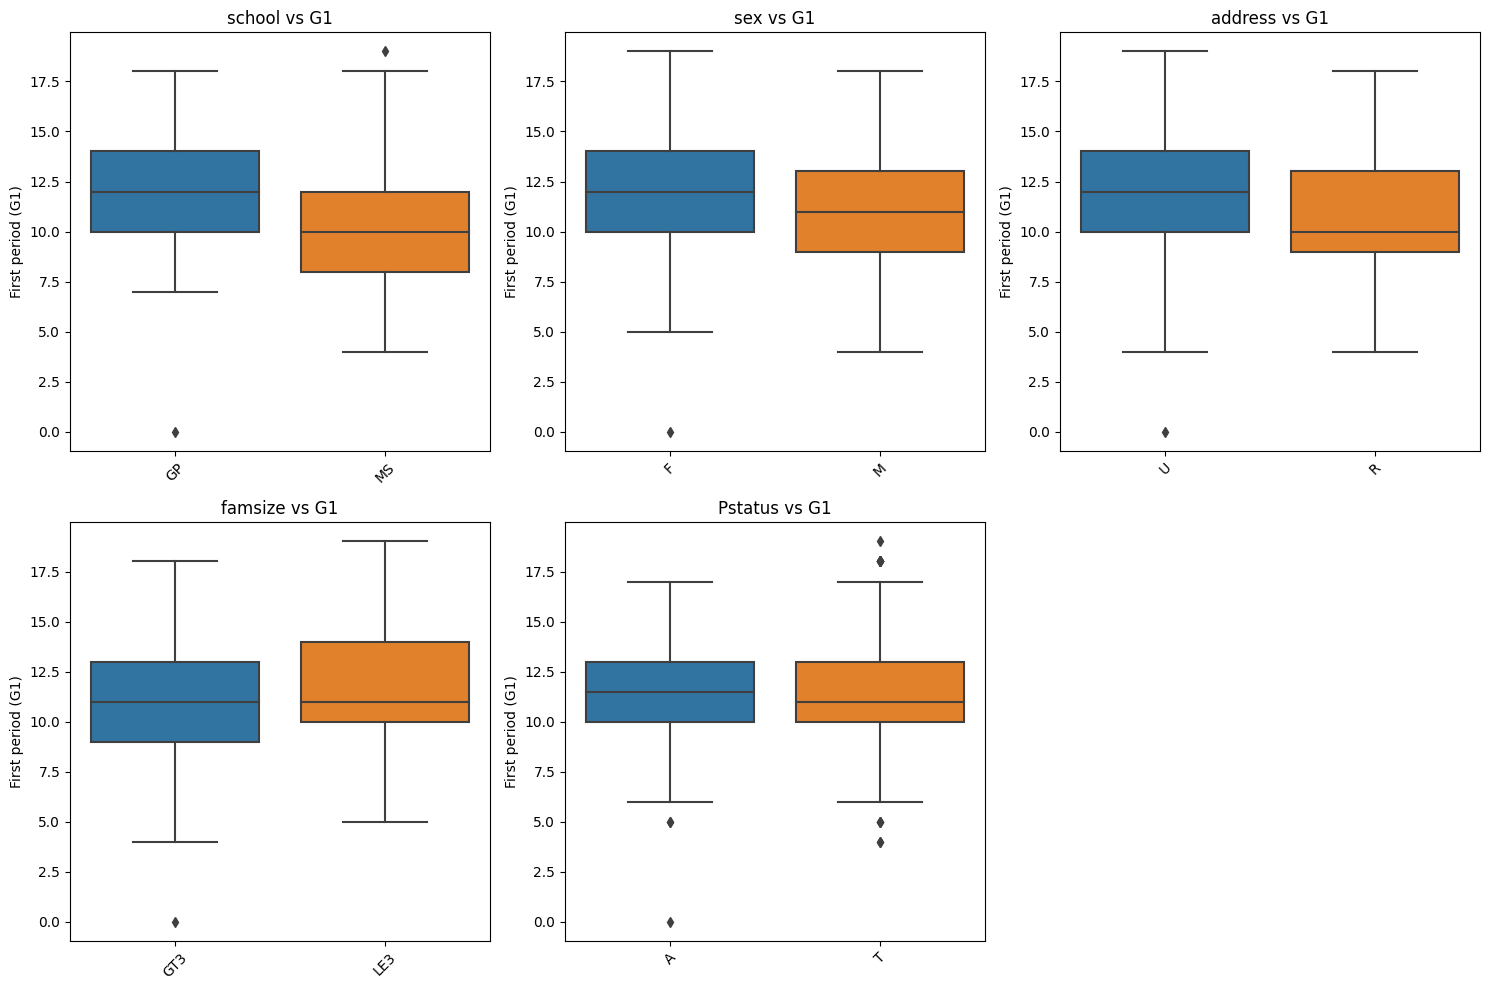

In [42]:
# Boxplots for the relationship between grades (First period G1) to classify and categorical variables
plt.figure(figsize=(15, 10))
selected_cat_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus']

for i, col in enumerate(selected_cat_cols):
    plt.subplot(len(selected_cat_cols)//3 + 1, 3, i+1)
    sns.boxplot(x=col, y='G1', data=df)
    plt.title(f'{col} vs G1')
    plt.xlabel('')
    plt.ylabel('First period (G1)')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [43]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [44]:
def sin_transformer(period):
    return lambda x: np.sin(2 * np.pi * x / period)
def cos_transformer(period):
    return lambda x: np.cos(2 * np.pi * x / period)

def preprocess_column(df, column_name):
    # Ignorar columnas G1, G2 y G3
    if column_name in ['G1', 'G2', 'G3']:
        return df
    
    values = df[column_name].unique()
    if len(values) == 2:
        df[column_name] = df[column_name].map({values[0]: 0, values[1]: 1}) # Binary mapping for 2 values
    elif len(values) == 3:
        df = pd.get_dummies(df, columns=[column_name]) # Dummy for 3 values
    else:
        df[column_name], uniques = pd.factorize(df[column_name].astype(str)) # Sin/Cos transformation for the rest
        period = len(uniques)
        df[f'{column_name}_sin'] = sin_transformer(period)(df[column_name])
        df[f'{column_name}_cos'] = cos_transformer(period)(df[column_name])
        df = df.drop(columns=[column_name])
    return df

for column in df.columns:
    df = preprocess_column(df, column)

df_transformed = df.applymap(lambda x: int(x) if isinstance(x, bool) else x) #0/1 to booleean values

#Separate tags before scale values
y, bins = pd.cut(df_transformed.G1, 3, labels=[0, 1, 2], retbins=True)
X = df.drop(columns=['G1', 'G2', 'G3'])

X_scaled = StandardScaler().fit_transform(X)

In [45]:
X.head()

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,...,goout_sin,goout_cos,Dalc_sin,Dalc_cos,Walc_sin,Walc_cos,health_sin,health_cos,absences_sin,absences_cos
0,0,0,0,0,0,0,0,0,0,0,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
1,0,0,0,0,1,1,1,0,0,1,...,0.951057,0.309017,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.258819,0.965926
2,0,0,0,1,1,0,0,0,0,0,...,0.587785,-0.809017,0.951057,0.309017,0.951057,0.309017,0.000000,1.000000,0.500000,0.866025
3,0,0,0,0,1,1,1,0,1,0,...,0.587785,-0.809017,0.000000,1.000000,0.000000,1.000000,0.951057,0.309017,0.707107,0.707107
4,0,0,0,0,1,1,1,0,0,0,...,0.587785,-0.809017,0.000000,1.000000,0.587785,-0.809017,0.951057,0.309017,0.707107,0.707107


In [46]:
#Make directory to save models
model_dir = '/Users/nfanlo/dev/technical-test/part1/models'
os.makedirs(model_dir, exist_ok=True)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2) #Split train/test 0.2

print(f'Dataset X_train shape: {X_train.shape}')
print(f'Dataset y_train shape: {y_train.shape}')
print('-'*80)
print(f'Dataset X_test shape: {X_test.shape}')
print(f'Dataset y_test shape: {X_test.shape}')


Dataset X_train shape: (519, 48)
Dataset y_train shape: (519,)
--------------------------------------------------------------------------------
Dataset X_test shape: (130, 48)
Dataset y_test shape: (130, 48)


In [47]:
best_model, best_model_name, best_accuracy = None, '', 0
test_scores = {}


models = {'RandomForest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=1000)}

params = {'RandomForest': {'n_estimators': [50, 100, 200]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
    'KNN': {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']},
    'MLP': {'hidden_layer_sizes': [(50,50), (100,)], 'activation': ['tanh', 'relu', 'logistic'],
        'solver': ['adam', 'sgd', 'lbfgs'], 'alpha': [0.0001, 0.001, 0.01], 'learning_rate': ['constant', 'adaptive']}}

cv = StratifiedKFold(n_splits=5, shuffle=True)

for model_name, model in models.items():
    grid = GridSearchCV(model, params[model_name], cv=cv, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_estimator = grid.best_estimator_

    scores = cross_val_score(best_estimator, X_train, y_train, cv=cv, scoring='accuracy')
    mean_accuracy = np.mean(scores)
    accuracy_variance = np.var(scores)

    model_path = os.path.join(model_dir, f'best_model_{model_name}.pkl')
    with open(model_path, 'wb') as f:
        pickle.dump(best_estimator, f)

    test_score = best_estimator.score(X_test, y_test)
    test_scores[model_name] = test_score
    test_predictions = best_estimator.predict(X_test)

    print(f'Best model for {model_name}: {best_estimator}')
    print(f'Mean cross-validated Accuracy: {mean_accuracy}')
    print(f'Variance of Accuracy: {accuracy_variance}')
    print(f'Test Accuracy: {test_score}')
    print(f'Classification report for {model_name}:\n{classification_report(y_test, test_predictions)}')
    print('-' * 80)

    if test_score > best_accuracy:
        best_model, best_model_name, best_accuracy = best_estimator, model_name, test_score

best_model_path = os.path.join(model_dir, f'best_model_{best_model_name}.pkl')
with open(best_model_path, 'wb') as f:
    pickle.dump(best_model, f)

print(f'Best overall model: {best_model}')
print(f'Best overall model name: {best_model_name}')
print(f'Best overall model saved to {best_model_path}')

Best model for RandomForest: RandomForestClassifier()
Mean cross-validated Accuracy: 0.6743091859596715
Variance of Accuracy: 0.0007618761507060259
Test Accuracy: 0.6153846153846154
Classification report for RandomForest:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.67      0.82      0.74        83
           2       0.43      0.29      0.34        42

    accuracy                           0.62       130
   macro avg       0.37      0.37      0.36       130
weighted avg       0.56      0.62      0.58       130

--------------------------------------------------------------------------------
Best model for SVM: SVC(C=10, probability=True)
Mean cross-validated Accuracy: 0.6416728902165796
Variance of Accuracy: 0.0009758607601785026
Test Accuracy: 0.6153846153846154
Classification report for SVM:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5


In [48]:
#Try to improve the classifiers by creating a voting classifier with sorft and hard srtategies
model_files = [f for f in os.listdir(model_dir) if f.startswith('best_model_') and f.endswith('.pkl')]
models = {}
for file in model_files:
    model_name = file.split('best_model_')[1].split('.pkl')[0]
    with open(os.path.join(model_dir, file), 'rb') as f:
        models[model_name] = pickle.load(f)

voting_clf_soft = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='soft')
voting_clf_hard = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='hard')

for voting_clf, clf_type in zip([voting_clf_soft, voting_clf_hard], ['soft', 'hard']):
    scores = cross_val_score(voting_clf, X_train, y_train, cv=cv, scoring='accuracy')
    mean_accuracy = np.mean(scores)
    accuracy_variance = np.var(scores)

    voting_clf.fit(X_train, y_train)

    model_path = os.path.join(model_dir, f'voting_classifier_{clf_type}.pkl')
    with open(model_path, 'wb') as f:
        pickle.dump(voting_clf, f)

    test_score = voting_clf.score(X_test, y_test)
    test_scores[f'voting_{clf_type}'] = test_score
    test_predictions = voting_clf.predict(X_test)

    print(f'{clf_type.capitalize()} Voting Classifier - Mean cross-validated Accuracy: {mean_accuracy}')
    print(f'{clf_type.capitalize()} Voting Classifier - Variance of Accuracy: {accuracy_variance}')
    print(f'{clf_type.capitalize()} Voting Classifier - Test Accuracy: {test_score}')
    print(f'Classification report:\n{classification_report(y_test, test_predictions)}')
    print('-' * 80)

Soft Voting Classifier - Mean cross-validated Accuracy: 0.6473300970873787
Soft Voting Classifier - Variance of Accuracy: 0.00036910926359834075
Soft Voting Classifier - Test Accuracy: 0.6153846153846154
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.66      0.83      0.73        83
           2       0.44      0.26      0.33        42

    accuracy                           0.62       130
   macro avg       0.37      0.36      0.35       130
weighted avg       0.56      0.62      0.57       130

--------------------------------------------------------------------------------
Hard Voting Classifier - Mean cross-validated Accuracy: 0.662864077669903
Hard Voting Classifier - Variance of Accuracy: 0.00037376367949284973
Hard Voting Classifier - Test Accuracy: 0.6076923076923076
Classification report:
              precision    recall  f1-score   support

           0       0.00      0

In [50]:
#Create and evaluate the Stacking Classifier with MLP
mlp_configs = [(f'mlp_{layers}', MLPClassifier(hidden_layer_sizes=(10,)*layers)) for layers in range(1, 6)]
best_stack_clf, best_score = None, 0

print('-' * 80)
for name, mlp in mlp_configs:
    stack_clf = StackingClassifier(estimators=[(name, mlp)], final_estimator=MLPClassifier())
    scores = cross_val_score(stack_clf, X_train, y_train, cv=cv, scoring='accuracy')
    mean_score = np.mean(scores)
    var_score = np.var(scores)

    stack_clf.fit(X_train, y_train)

    model_path = os.path.join(model_dir, f'stacking_{name}.pkl')
    with open(model_path, 'wb') as f:
        pickle.dump(stack_clf, f)

    test_score = stack_clf.score(X_test, y_test)
    test_scores[name] = test_score
    test_predictions = stack_clf.predict(X_test)

    print(f'Model with {name} - Mean cross-validated Accuracy: {mean_score}')
    print(f'Model with {name} - Variance of Accuracy: {var_score}')
    print(f'Model with {name} - Test Accuracy: {test_score}')
    print(f'Classification report:\n{classification_report(y_test, test_predictions)}')
    print('-' * 80)

    if test_score > best_score:
        best_stack_clf, best_score = stack_clf, test_score

best_model_path = os.path.join(model_dir, 'best_stacking_mlp.pkl')
with open(best_model_path, 'wb') as f:
    pickle.dump(best_stack_clf, f)

print(f'Best MLP stacking classifier saved to {best_model_path}')

--------------------------------------------------------------------------------
Model with mlp_1 - Mean cross-validated Accuracy: 0.6494398805078416
Model with mlp_1 - Variance of Accuracy: 0.0012119029505482967
Model with mlp_1 - Test Accuracy: 0.5846153846153846
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.66      0.73      0.69        83
           2       0.41      0.36      0.38        42

    accuracy                           0.58       130
   macro avg       0.35      0.36      0.36       130
weighted avg       0.55      0.58      0.57       130

--------------------------------------------------------------------------------
Model with mlp_2 - Mean cross-validated Accuracy: 0.6300597460791636
Model with mlp_2 - Variance of Accuracy: 0.0003515854853615972
Model with mlp_2 - Test Accuracy: 0.5769230769230769
Classification report:
              precision    recall  f1-sco

In [51]:
#Stacking Classifier Logistic Regression with all models
estimators = [(name, model) for name, model in models.items()]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)

scores = cross_val_score(stacking_clf, X_train, y_train, cv=cv, scoring='accuracy')
mean_score = np.mean(scores)
var_score = np.var(scores)

stacking_clf.fit(X_train, y_train)

stacking_model_path = os.path.join(model_dir, 'stacking_classifier.pkl')
with open(stacking_model_path, 'wb') as f:
    pickle.dump(stacking_clf, f)

test_score = stacking_clf.score(X_test, y_test)
test_scores['stacking'] = test_score
test_predictions = stacking_clf.predict(X_test)

print(f'Stacking Classifier - Mean cross-validated Accuracy: {mean_score}')
print(f'Stacking Classifier - Variance of Accuracy: {var_score}')
print(f'Stacking Classifier - Test Accuracy: {test_score}')
print(f'Classification report:\n{classification_report(y_test, test_predictions)}')
print('-' * 80)

Stacking Classifier - Mean cross-validated Accuracy: 0.658831217326363
Stacking Classifier - Variance of Accuracy: 0.004192225284884274
Stacking Classifier - Test Accuracy: 0.6538461538461539
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.69      0.84      0.76        83
           2       0.54      0.36      0.43        42

    accuracy                           0.65       130
   macro avg       0.41      0.40      0.40       130
weighted avg       0.61      0.65      0.62       130

--------------------------------------------------------------------------------


In [52]:
#Bagging classifier with SVC
estimators_counts = [100, 250, 500, 750, 1000]
print('-' * 80)

best_bagging_clf, best_score = None, 0

for count in estimators_counts:
    bagging_clf = BaggingClassifier(estimator=SVC(), n_estimators=count)
    scores = cross_val_score(bagging_clf, X_train, y_train, cv=cv, scoring='accuracy')
    mean_score = np.mean(scores)
    var_score = np.var(scores)

    bagging_clf.fit(X_train, y_train)

    model_path = os.path.join(model_dir, f'bagging_svc_{count}_estimators.pkl')
    with open(model_path, 'wb') as f:
        pickle.dump(bagging_clf, f)

    test_score = bagging_clf.score(X_test, y_test)
    test_scores[f'bagging_{count}'] = test_score
    test_predictions = bagging_clf.predict(X_test)

    print(f'Bagging with {count} estimators - Mean cross-validated Accuracy: {mean_score}')
    print(f'Bagging with {count} estimators - Variance of Accuracy: {var_score}')
    print(f'Bagging with {count} estimators - Test Accuracy: {test_score}')
    print(f'Classification report:\n{classification_report(y_test, test_predictions)}')
    print('-' * 80)

    if test_score > best_score:
        best_bagging_clf, best_score = bagging_clf, test_score

best_model_path = os.path.join(model_dir, 'best_bagging_svc.pkl')
with open(best_model_path, 'wb') as f:
    pickle.dump(best_bagging_clf, f)

print(f'Best Bagging SVC classifier saved to {best_model_path}')

--------------------------------------------------------------------------------
Bagging with 100 estimators - Mean cross-validated Accuracy: 0.6571882001493653
Bagging with 100 estimators - Variance of Accuracy: 0.0030833253389301596
Bagging with 100 estimators - Test Accuracy: 0.6461538461538462
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.68      0.86      0.76        83
           2       0.52      0.31      0.39        42

    accuracy                           0.65       130
   macro avg       0.40      0.39      0.38       130
weighted avg       0.60      0.65      0.61       130

--------------------------------------------------------------------------------
Bagging with 250 estimators - Mean cross-validated Accuracy: 0.657150858849888
Bagging with 250 estimators - Variance of Accuracy: 0.0018777165865088315
Bagging with 250 estimators - Test Accuracy: 0.6538461538461539

In [53]:
#Create and evaluate AdaBoostClassifier
estimators_counts = [50, 100, 150, 200, 250, 300]

best_model, best_score, best_count = None, 0, 0

print('-' * 80)
for count in estimators_counts:
    ada_clf = AdaBoostClassifier(n_estimators=count)
    scores = cross_val_score(ada_clf, X_train, y_train, cv=cv, scoring='accuracy')
    mean_score = np.mean(scores)
    var_score = np.var(scores)

    ada_clf.fit(X_train, y_train)

    model_path = os.path.join(model_dir, f'adaboost_{count}.pkl')
    with open(model_path, 'wb') as f:
        pickle.dump(ada_clf, f)

    test_score = ada_clf.score(X_test, y_test)
    test_scores[f'adaboost_{count}'] = test_score
    test_predictions = ada_clf.predict(X_test)

    print(f'AdaBoost with {count} estimators - Mean cross-validated Accuracy: {mean_score}')
    print(f'AdaBoost with {count} estimators - Variance of Accuracy: {var_score}')
    print(f'AdaBoost with {count} estimators - Test Accuracy: {test_score}')
    print(f'Classification report:\n{classification_report(y_test, test_predictions)}')
    print('-' * 80)

    if test_score > best_score:
        best_model, best_score, best_count = ada_clf, test_score, count

best_model_path = os.path.join(model_dir, 'best_adaboost.pkl')
with open(best_model_path, 'wb') as f:
    pickle.dump(best_model, f)

print(f'Best AdaBoost model with {best_count} estimators saved to {best_model_path}')

--------------------------------------------------------------------------------
AdaBoost with 50 estimators - Mean cross-validated Accuracy: 0.6203323375653472
AdaBoost with 50 estimators - Variance of Accuracy: 0.0007262589930063849
AdaBoost with 50 estimators - Test Accuracy: 0.6
Classification report:
              precision    recall  f1-score   support

           0       0.38      0.60      0.46         5
           1       0.69      0.71      0.70        83
           2       0.44      0.38      0.41        42

    accuracy                           0.60       130
   macro avg       0.50      0.56      0.52       130
weighted avg       0.60      0.60      0.60       130

--------------------------------------------------------------------------------
AdaBoost with 100 estimators - Mean cross-validated Accuracy: 0.5510828976848394
AdaBoost with 100 estimators - Variance of Accuracy: 0.002587918681302745
AdaBoost with 100 estimators - Test Accuracy: 0.6615384615384615
Classificat

In [54]:
print(f'Test Scores with outliers: \n{test_scores}')

Test Scores with outliers: 
{'RandomForest': 0.6153846153846154, 'SVM': 0.6153846153846154, 'KNN': 0.5769230769230769, 'MLP': 0.676923076923077, 'voting_soft': 0.6153846153846154, 'voting_hard': 0.6076923076923076, 'mlp_1': 0.5846153846153846, 'mlp_2': 0.5769230769230769, 'mlp_3': 0.6, 'mlp_4': 0.6384615384615384, 'mlp_5': 0.6230769230769231, 'stacking': 0.6538461538461539, 'bagging_100': 0.6461538461538462, 'bagging_250': 0.6538461538461539, 'bagging_500': 0.6538461538461539, 'bagging_750': 0.6461538461538462, 'bagging_1000': 0.6384615384615384, 'adaboost_50': 0.6, 'adaboost_100': 0.6615384615384615, 'adaboost_150': 0.6230769230769231, 'adaboost_200': 0.5615384615384615, 'adaboost_250': 0.5769230769230769, 'adaboost_300': 0.5615384615384615}


In [55]:
#Eliminate the outliers detected in the boxplots to see if the metrics of the models improve
def remove_outliers(df):
    for col in df.select_dtypes(include='number').columns:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

outlier_counts = count_outliers(df)
for col, count in outlier_counts.items():
    print(f'{col}: {count} outliers')
print('-'*80)

df_outliers = remove_outliers(df)
print('Shape without outliers:', df_outliers.shape)

for column in df_outliers.columns:
    df_transformed_outliers = preprocess_column(df_outliers, column)

df_transformed_outliers = df_transformed_outliers.applymap(lambda x: int(x) if isinstance(x, bool) else x)

y, bins = pd.cut(df_transformed_outliers.G1, 3, labels=[0, 1, 2], retbins=True)
X = df_transformed_outliers.drop(columns=['G1', 'G2', 'G3'])

X_scaled = StandardScaler().fit_transform(X)


school: 0 outliers
sex: 0 outliers
address: 0 outliers
famsize: 0 outliers
Pstatus: 80 outliers
schoolsup: 68 outliers
famsup: 0 outliers
paid: 39 outliers
activities: 0 outliers
nursery: 128 outliers
higher: 69 outliers
internet: 151 outliers
romantic: 0 outliers
G1: 16 outliers
G2: 25 outliers
G3: 16 outliers
age_sin: 0 outliers
age_cos: 0 outliers
Medu_sin: 0 outliers
Medu_cos: 0 outliers
Fedu_sin: 0 outliers
Fedu_cos: 0 outliers
Mjob_sin: 0 outliers
Mjob_cos: 0 outliers
Fjob_sin: 101 outliers
Fjob_cos: 0 outliers
reason_sin: 215 outliers
reason_cos: 0 outliers
guardian_father: 153 outliers
guardian_mother: 0 outliers
guardian_other: 41 outliers
traveltime_sin: 0 outliers
traveltime_cos: 0 outliers
studytime_sin: 132 outliers
studytime_cos: 0 outliers
failures_sin: 100 outliers
failures_cos: 100 outliers
famrel_sin: 0 outliers
famrel_cos: 123 outliers
freetime_sin: 68 outliers
freetime_cos: 0 outliers
goout_sin: 0 outliers
goout_cos: 0 outliers
Dalc_sin: 198 outliers
Dalc_cos: 60 ou

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [57]:
model_dir = '/Users/nfanlo/dev/technical-test/part1/models-outliers'
os.makedirs(model_dir, exist_ok=True)

test_scores_outliers = {}

# Define models and parameters
models = {'RandomForest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=1000)}

params = {'RandomForest': {'n_estimators': [50, 100, 200]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
    'KNN': {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']},
    'MLP': {'hidden_layer_sizes': [(50,50), (100,)], 'activation': ['tanh', 'relu', 'logistic'],
            'solver': ['adam', 'sgd', 'lbfgs'], 'alpha': [0.0001, 0.001, 0.01], 'learning_rate': ['constant', 'adaptive']}}

# Train and evaluate models using GridSearchCV
best_model, best_model_name, best_accuracy = None, '', 0
for model_name, model in models.items():
    grid = GridSearchCV(model, params[model_name], cv=cv, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_estimator = grid.best_estimator_
    scores = cross_val_score(best_estimator, X_train, y_train, cv=cv, scoring='accuracy')
    mean_accuracy, accuracy_variance = scores.mean(), scores.var()

    model_path = os.path.join(model_dir, f'best_model_{model_name}.pkl')
    with open(model_path, 'wb') as f:
        pickle.dump(best_estimator, f)

    test_score = best_estimator.score(X_test, y_test)
    test_scores_outliers[model_name] = test_score
    test_predictions = best_estimator.predict(X_test)

    print(f'Best model for {model_name}: {best_estimator}')
    print(f'Mean cross-validated Accuracy: {mean_accuracy}')
    print(f'Variance of Accuracy: {accuracy_variance}')
    print(f'Test Accuracy: {test_score}')
    print(f'Classification report for {model_name}:\n{classification_report(y_test, test_predictions)}')
    print('-' * 80)

    if test_score > best_accuracy:
        best_model, best_model_name, best_accuracy = best_estimator, model_name, test_score

best_model_path = os.path.join(model_dir, f'best_model_{best_model_name}.pkl')
with open(best_model_path, 'wb') as f:
    pickle.dump(best_model, f)

print(f'Best overall model: {best_model}')
print(f'Best overall model name: {best_model_name}')
print(f'Best overall model saved to {best_model_path}')
print('-' * 80)

#Voting Classifiers
voting_clf_soft = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='soft')
voting_clf_hard = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='hard')

for voting_clf, clf_type in zip([voting_clf_soft, voting_clf_hard], ['soft', 'hard']):
    scores = cross_val_score(voting_clf, X_train, y_train, cv=cv, scoring='accuracy')
    mean_accuracy = np.mean(scores)
    accuracy_variance = np.var(scores)

    voting_clf.fit(X_train, y_train)

    model_path = os.path.join(model_dir, f'voting_classifier_{clf_type}.pkl')
    with open(model_path, 'wb') as f:
        pickle.dump(voting_clf, f)

    test_score = voting_clf.score(X_test, y_test)
    test_scores_outliers[f'voting_{clf_type}'] = test_score
    test_predictions = voting_clf.predict(X_test)

    print(f'{clf_type.capitalize()} Voting Classifier - Mean cross-validated Accuracy: {mean_accuracy}')
    print(f'{clf_type.capitalize()} Voting Classifier - Variance of Accuracy: {accuracy_variance}')
    print(f'{clf_type.capitalize()} Voting Classifier - Test Accuracy: {test_score}')
    print(f'Classification report:\n{classification_report(y_test, test_predictions)}')
    print('-' * 80)


#Stacking Classifier with MLP
mlp_configs = [(f'mlp_{layers}', MLPClassifier(hidden_layer_sizes=(10,)*layers)) for layers in range(1, 6)]
best_stack_clf, best_score = None, 0
for name, mlp in mlp_configs:
    stack_clf = StackingClassifier(estimators=[(name, mlp)], final_estimator=MLPClassifier())
    scores = cross_val_score(stack_clf, X_train, y_train, cv=cv, scoring='accuracy')
    mean_score = np.mean(scores)
    var_score = np.var(scores)

    stack_clf.fit(X_train, y_train)

    model_path = os.path.join(model_dir, f'stacking_{name}.pkl')
    with open(model_path, 'wb') as f:
        pickle.dump(stack_clf, f)

    test_score = stack_clf.score(X_test, y_test)
    test_scores_outliers[name] = test_score
    test_predictions = stack_clf.predict(X_test)

    print(f'Model with {name} - Mean cross-validated Accuracy: {mean_score}')
    print(f'Model with {name} - Variance of Accuracy: {var_score}')
    print(f'Model with {name} - Test Accuracy: {test_score}')
    print(f'Classification report:\n{classification_report(y_test, test_predictions)}')
    print('-' * 80)

    if test_score > best_score:
        best_stack_clf, best_score = stack_clf, test_score

best_model_path = os.path.join(model_dir, 'best_stacking_mlp.pkl')
with open(best_model_path, 'wb') as f:
    pickle.dump(best_stack_clf, f)

print(f'Best MLP stacking classifier saved to {best_model_path}')
print('-' * 80)

# Stacking Classifier with all models Logistic Regression
estimators = [(name, model) for name, model in models.items()]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)

scores = cross_val_score(stacking_clf, X_train, y_train, cv=cv, scoring='accuracy')
mean_score = np.mean(scores)
var_score = np.var(scores)

stacking_clf.fit(X_train, y_train)

stacking_model_path = os.path.join(model_dir, 'stacking_classifier.pkl')
with open(stacking_model_path, 'wb') as f:
    pickle.dump(stacking_clf, f)

test_score = stacking_clf.score(X_test, y_test)
test_scores_outliers['stacking'] = test_score
test_predictions = stacking_clf.predict(X_test)

print(f'Stacking Classifier - Mean cross-validated Accuracy: {mean_score}')
print(f'Stacking Classifier - Variance of Accuracy: {var_score}')
print(f'Stacking Classifier - Test Accuracy: {test_score}')
print(f'Classification report:\n{classification_report(y_test, test_predictions)}')
print('-' * 80)

#Bagging Classifier with SVC
estimators_counts = [100, 250, 500, 750, 1000]
best_bagging_clf, best_score = None, 0
for count in estimators_counts:
    bagging_clf = BaggingClassifier(estimator=SVC(), n_estimators=count)
    scores = cross_val_score(bagging_clf, X_train, y_train, cv=cv, scoring='accuracy')
    mean_score = np.mean(scores)
    var_score = np.var(scores)

    bagging_clf.fit(X_train, y_train)

    model_path = os.path.join(model_dir, f'bagging_svc_{count}_estimators.pkl')
    with open(model_path, 'wb') as f:
        pickle.dump(bagging_clf, f)

    test_score = bagging_clf.score(X_test, y_test)
    test_scores_outliers[f'bagging_{count}'] = test_score
    test_predictions = bagging_clf.predict(X_test)

    print(f'Bagging with {count} estimators - Mean cross-validated Accuracy: {mean_score}')
    print(f'Bagging with {count} estimators - Variance of Accuracy: {var_score}')
    print(f'Bagging with {count} estimators - Test Accuracy: {test_score}')
    print(f'Classification report:\n{classification_report(y_test, test_predictions)}')
    print('-' * 80)

    if test_score > best_score:
        best_bagging_clf, best_score = bagging_clf, test_score

# Guardar el mejor modelo de bagging
best_model_path = os.path.join(model_dir, 'best_bagging_svc.pkl')
with open(best_model_path, 'wb') as f:
    pickle.dump(best_bagging_clf, f)

print(f'Best Bagging SVC classifier saved to {best_model_path}')

#AdaBoost Classifier
estimators_counts = [50, 100, 150, 200, 250, 300]
best_model, best_score, best_count = None, 0, 0
for count in estimators_counts:
    ada_clf = AdaBoostClassifier(n_estimators=count)
    scores = cross_val_score(ada_clf, X_train, y_train, cv=cv, scoring='accuracy')
    mean_score = np.mean(scores)
    var_score = np.var(scores)

    ada_clf.fit(X_train, y_train)

    # Guardar el modelo
    model_path = os.path.join(model_dir, f'adaboost_{count}.pkl')
    with open(model_path, 'wb') as f:
        pickle.dump(ada_clf, f)

    test_score = ada_clf.score(X_test, y_test)
    test_scores_outliers[f'adaboost_{count}'] = test_score
    test_predictions = ada_clf.predict(X_test)

    print(f'AdaBoost with {count} estimators - Mean cross-validated Accuracy: {mean_score}')
    print(f'AdaBoost with {count} estimators - Variance of Accuracy: {var_score}')
    print(f'AdaBoost with {count} estimators - Test Accuracy: {test_score}')
    print(f'Classification report:\n{classification_report(y_test, test_predictions)}')
    print('-' * 80)

    if test_score > best_score:
        best_model, best_score, best_count = ada_clf, test_score, count

best_model_path = os.path.join(model_dir, 'best_adaboost.pkl')
with open(best_model_path, 'wb') as f:
    pickle.dump(best_model, f)

print(f'Best AdaBoost model with {best_count} estimators saved to {best_model_path}')


Best model for RandomForest: RandomForestClassifier()
Mean cross-validated Accuracy: 0.4533333333333333
Variance of Accuracy: 0.022044444444444443
Test Accuracy: 0.5
Classification report for RandomForest:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      0.50      0.57         4
           2       0.40      1.00      0.57         2

    accuracy                           0.50         8
   macro avg       0.36      0.50      0.38         8
weighted avg       0.43      0.50      0.43         8

--------------------------------------------------------------------------------
Best model for SVM: SVC(C=0.1, kernel='poly', probability=True)
Mean cross-validated Accuracy: 0.44666666666666666
Variance of Accuracy: 0.004711111111111111
Test Accuracy: 0.5
Classification report for SVM:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1   

Bagging with 100 estimators - Mean cross-validated Accuracy: 0.44666666666666666
Bagging with 100 estimators - Variance of Accuracy: 0.026933333333333337
Bagging with 100 estimators - Test Accuracy: 0.375
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.75      0.60         4
           2       0.00      0.00      0.00         2

    accuracy                           0.38         8
   macro avg       0.17      0.25      0.20         8
weighted avg       0.25      0.38      0.30         8

--------------------------------------------------------------------------------


Bagging with 250 estimators - Mean cross-validated Accuracy: 0.4133333333333333
Bagging with 250 estimators - Variance of Accuracy: 0.005600000000000001
Bagging with 250 estimators - Test Accuracy: 0.375
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.75      0.60         4
           2       0.00      0.00      0.00         2

    accuracy                           0.38         8
   macro avg       0.17      0.25      0.20         8
weighted avg       0.25      0.38      0.30         8

--------------------------------------------------------------------------------


Bagging with 500 estimators - Mean cross-validated Accuracy: 0.4533333333333333
Bagging with 500 estimators - Variance of Accuracy: 0.010933333333333333
Bagging with 500 estimators - Test Accuracy: 0.375
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.75      0.60         4
           2       0.00      0.00      0.00         2

    accuracy                           0.38         8
   macro avg       0.17      0.25      0.20         8
weighted avg       0.25      0.38      0.30         8

--------------------------------------------------------------------------------


Bagging with 750 estimators - Mean cross-validated Accuracy: 0.30666666666666664
Bagging with 750 estimators - Variance of Accuracy: 0.0028444444444444433
Bagging with 750 estimators - Test Accuracy: 0.375
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.75      0.60         4
           2       0.00      0.00      0.00         2

    accuracy                           0.38         8
   macro avg       0.17      0.25      0.20         8
weighted avg       0.25      0.38      0.30         8

--------------------------------------------------------------------------------


Bagging with 1000 estimators - Mean cross-validated Accuracy: 0.38
Bagging with 1000 estimators - Variance of Accuracy: 0.004266666666666668
Bagging with 1000 estimators - Test Accuracy: 0.375
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.75      0.60         4
           2       0.00      0.00      0.00         2

    accuracy                           0.38         8
   macro avg       0.17      0.25      0.20         8
weighted avg       0.25      0.38      0.30         8

--------------------------------------------------------------------------------
Best Bagging SVC classifier saved to /Users/nfanlo/dev/technical-test/part1/models-outliers/best_bagging_svc.pkl
AdaBoost with 50 estimators - Mean cross-validated Accuracy: 0.24
AdaBoost with 50 estimators - Variance of Accuracy: 0.005955555555555554
AdaBoost with 50 estimators - Test Accuracy: 0.375
Classification repo

In [58]:
print(f'Test Scores with outlieers: \n{test_scores}')
print('-'*80)
print(f'Test Scores without outliers: \n{test_scores}')

Test Scores with outlieers: 
{'RandomForest': 0.6153846153846154, 'SVM': 0.6153846153846154, 'KNN': 0.5769230769230769, 'MLP': 0.676923076923077, 'voting_soft': 0.6153846153846154, 'voting_hard': 0.6076923076923076, 'mlp_1': 0.5846153846153846, 'mlp_2': 0.5769230769230769, 'mlp_3': 0.6, 'mlp_4': 0.6384615384615384, 'mlp_5': 0.6230769230769231, 'stacking': 0.6538461538461539, 'bagging_100': 0.6461538461538462, 'bagging_250': 0.6538461538461539, 'bagging_500': 0.6538461538461539, 'bagging_750': 0.6461538461538462, 'bagging_1000': 0.6384615384615384, 'adaboost_50': 0.6, 'adaboost_100': 0.6615384615384615, 'adaboost_150': 0.6230769230769231, 'adaboost_200': 0.5615384615384615, 'adaboost_250': 0.5769230769230769, 'adaboost_300': 0.5615384615384615}
--------------------------------------------------------------------------------
Test Scores without outliers: 
{'RandomForest': 0.6153846153846154, 'SVM': 0.6153846153846154, 'KNN': 0.5769230769230769, 'MLP': 0.676923076923077, 'voting_soft': 0.